# Question 1
Zipf's Law : It is a a statistical relationship between rank and frequency of words in large corpora. The frequency of a word is inversely proportional to its statistical rank.

In [174]:
#Use glob to read files
import glob

In [175]:
#Read all the files to list_of_files
list_of_files = glob.glob('/Users/sjain/nltk_data/corpora/gutenberg/*.txt')

In [176]:
#Displays the list of files thats read
list_of_files

['/Users/sjain/nltk_data/corpora/gutenberg/*.txt',
 '/Users/sjain/nltk_data/corpora/gutenberg/austen-emma.txt',
 '/Users/sjain/nltk_data/corpora/gutenberg/austen-persuasion.txt',
 '/Users/sjain/nltk_data/corpora/gutenberg/austen-sense.txt',
 '/Users/sjain/nltk_data/corpora/gutenberg/bible-kjv.txt',
 '/Users/sjain/nltk_data/corpora/gutenberg/blake-poems.txt',
 '/Users/sjain/nltk_data/corpora/gutenberg/bryant-stories.txt',
 '/Users/sjain/nltk_data/corpora/gutenberg/burgess-busterbrown.txt',
 '/Users/sjain/nltk_data/corpora/gutenberg/carroll-alice.txt',
 '/Users/sjain/nltk_data/corpora/gutenberg/chesterton-ball.txt',
 '/Users/sjain/nltk_data/corpora/gutenberg/chesterton-brown.txt',
 '/Users/sjain/nltk_data/corpora/gutenberg/chesterton-thursday.txt',
 '/Users/sjain/nltk_data/corpora/gutenberg/edgeworth-parents.txt',
 '/Users/sjain/nltk_data/corpora/gutenberg/melville-moby_dick.txt',
 '/Users/sjain/nltk_data/corpora/gutenberg/milton-paradise.txt',
 '/Users/sjain/nltk_data/corpora/gutenberg/

In [185]:
#Looping all the files to merge to one txt
with open('/Users/sjain/Python/Jain_Shreya_Spring2017/Assignment2/guten.txt', 'w' ) as result:
    for file in list_of_files:
        for line in open(file, 'r',encoding='utf-8', errors='ignore'):
            result.write(line)

In [186]:
open_file = open('/Users/sjain/Python/Jain_Shreya_Spring2017/Assignment2/Gutenbergdata/guten.txt', 'r')

In [187]:
#Create an empty list
l = []

# Read the file by lines
contents = open_file.readlines()

In [188]:
#Displays the content read by the file
contents[:20]

['[Emma by Jane Austen 1816]\n',
 '\n',
 'VOLUME I\n',
 '\n',
 'CHAPTER I\n',
 '\n',
 '\n',
 'Emma Woodhouse, handsome, clever, and rich, with a comfortable home\n',
 'and happy disposition, seemed to unite some of the best blessings\n',
 'of existence; and had lived nearly twenty-one years in the world\n',
 'with very little to distress or vex her.\n',
 '\n',
 'She was the youngest of the two daughters of a most affectionate,\n',
 "indulgent father; and had, in consequence of her sister's marriage,\n",
 'been mistress of his house from a very early period.  Her mother\n',
 'had died too long ago for her to have more than an indistinct\n',
 'remembrance of her caresses; and her place had been supplied\n',
 'by an excellent woman as governess, who had fallen little short\n',
 'of a mother in affection.\n',
 '\n']

In [189]:
#Helps clean the data
import re

In [190]:
# Creating a loop to insert the words in list.
for line in range(len(contents)):
    l.extend(re.findall(r"[\w']+", contents[line]))

In [191]:
#Total no. of lines
line

396455

In [192]:
def make_list(line):
    words = []
    for x in line:
        words = words + cleanup(x)
    return words

In [193]:
# Creating a function to write a regular expression that will substitute all the individual words in the text variable   
def clean(element):
    return  re.sub('[^a-zA-Z0-9 \n\.]', '', element)

In [194]:
# cleaning the list and storing it to a new list
wordList = []
for c in range(len(l)):
    removed = clean(l[c])
    wordList.append(removed)

In [195]:
#dictionary
frequency={}

# Looping to calculate the frequency of occurrence of each word
for word in wordList:
    count = frequency.get(word,0)
    frequency[word] = count + 1

In [196]:
# Using lambda and sorting the dictionary
sortedDict = sorted(frequency.items(), key=lambda x: (-x[1], x[0])) 

In [197]:
print(sortedDict[:20])

[('the', 202668), ('and', 128254), ('of', 113677), ('to', 69835), ('in', 49432), ('a', 47108), ('that', 43432), ('I', 42725), ('he', 35326), ('his', 31827), ('And', 30179), ('it', 29467), ('was', 28029), ('for', 26781), ('not', 26178), ('be', 25591), ('with', 25349), ('is', 24803), ('shall', 21504), ('him', 21307)]


In [198]:
# Ranking the words
i = 1
rankList = []

for rank in range(len(sortedDict)):
    obj1 = sortedDict[rank]
    obj1 = obj1 + (i,)
    rankList.append(obj1)
    i = i+1

print(rankList[:20])

[('the', 202668, 1), ('and', 128254, 2), ('of', 113677, 3), ('to', 69835, 4), ('in', 49432, 5), ('a', 47108, 6), ('that', 43432, 7), ('I', 42725, 8), ('he', 35326, 9), ('his', 31827, 10), ('And', 30179, 11), ('it', 29467, 12), ('was', 28029, 13), ('for', 26781, 14), ('not', 26178, 15), ('be', 25591, 16), ('with', 25349, 17), ('is', 24803, 18), ('shall', 21504, 19), ('him', 21307, 20)]


In [199]:
import csv

In [200]:
# Create and write the data to a csv with word, frequency and rank
csvFile = '/Users/sjain/Python/Jain_Shreya_Spring2017/Assignment2/gutenbergFrequency.csv'

with open(csvFile, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["Word", "Frequency", "Rank"])
    a.writerows(rankList)

In [201]:
import matplotlib.pyplot as plt

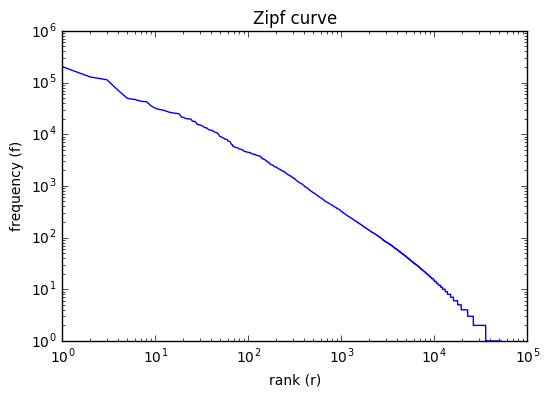

In [202]:
# Ploting the loglog figure.
exportFig = '/Users/sjain/Python/Jain_Shreya_Spring2017/Assignment2/zipfGraph.png'
x = []
y = []


# Reading CSV file in order to generate loglog figure.
with open(csvFile,'r') as csvfile:
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[2]))
        y.append(int(row[1]))

plt.loglog(x,y, label='Freq vs Rank')
plt.xlabel('rank (r)')
plt.ylabel('frequency (f)')
plt.title('Zipf curve')
plt.legend
plt.savefig(exportFig, bbox_inches='tight')
plt.show()

# Conlusion
Zipf's Law is useful to describe how words are distributed in human languages - there are a few words that are very common, a few that occur with medium frequency and a very large number of words that occur very rarely. The log-log graph plots the collection frequency of a term as a function of its rank.